<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Regresión Lógistica  </h1>
  <p></p>
</div>

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Lo que distingue un modelo de regresión logística del modelo de regresión lineal es que la variable de resultado en la regresión logística es binaria o dicotómica . Esta diferencia entre regresión logística y lineal se refleja tanto en la forma del modelo como en sus supuestos. Una vez que se tiene en cuenta esta diferencia, los métodos empleados en un análisis que utiliza la regresión logística siguen, más o menos, los mismos principios generales utilizados en la regresión lineal. Por lo tanto, las técnicas utilizadas en el análisis de regresión lineal motivan nuestro enfoque de la regresión logística

La siguiente tabla enumera la edad en años (EDAD) y la presencia o ausencia de evidencia de enfermedad coronaria significativa ( CHD ) para 100 sujetos en un estudio hipotético de factores de riesgo de enfermedad cardíaca. La tabla también contiene una variable de identificación ( ID ) y una variable de grupo de edad (AGEGRP). La variable de resultado es CHD, que se codifica con un valor de "0" para indicar que CHD está ausente, o "1" para indicar que está presente en el individuo. En general, se pueden usar dos valores, pero hemos encontrado que es más conveniente usar cero y uno. Nos referimos a este conjunto de datos como los datos de CHDAGE. La Tabla muestra edad, grupo de edad y enfermedad coronaria (CHD) de 100 sujetos

<img src="images/rl_1.png" height="300" width="400" >

Es interesante explorar la relación entre AGE y la presencia o ausencia de CHD en este grupo. Si nuestra variable de resultado hubiera sido continua en lugar de binaria, probablemente comenzaríamos formando un diagrama de dispersión del resultado versus la variable independiente. Usaríamos este diagrama de dispersión para proporcionar una impresión de la naturaleza y la fuerza de cualquier relación entre el resultado y la variable independiente.

<img src="images/rl_2.png" height="300" width="400" >

En este diagrama de dispersión, todos los puntos caen en una de dos líneas paralelas que representan la ausencia de CHD ($y = 0$) o la presencia de CHD ($y = 1$ ). Hay cierta tendencia a que los individuos sin evidencia de CHD sean más jóvenes que aquellos con evidencia de CHD. Si bien este gráfico representa la naturaleza dicotómica de la variable de resultado con bastante claridad, no proporciona una imagen clara de la naturaleza de la relación entre CHD y AGE.

El principal problema con la Figura anterior (figura 1) es que la variabilidad en CHD en todas las edades es grande. Esto hace que sea difícil ver una relación funcional entre AGE y CHD. Un método común para eliminar alguna variación, mientras se mantiene la estructura de la relación entre el resultado y la variable independiente, es crear intervalos para la variable independiente y calcular la media de la variable de resultado dentro de cada grupo. Utilizamos esta estrategia agrupando la edad en las categorías (AGEGRP) definidas en la Tabla 1 . La Tabla  siguiente (tabla 2) contiene, para cada grupo de edad, la frecuencia de ocurrencia de cada resultado, así como el porcentaje con CHD presente.

<img src="images/rl_3.png" height="300" width="400" >

Al examinar esta tabla, comienza a surgir una imagen más clara de la relación. Muestra que a medida que aumenta la edad, aumenta la proporción (media) de individuos con evidencia de CHD. La siguiente figura (Figura 2) presenta una gráfica del porcentaje de individuos con CHD versus el punto medio de cada intervalo de edad. Este gráfico proporciona una visión considerable de la relación entre CHD y AGE en este estudio, pero es necesario describir la forma funcional de esta relación. La gráfica en esta figura es similar a la que se podría obtener si este mismo proceso de agrupación y promedio se realizara en una regresión lineal. Notamos dos diferencias importantes.

<img src="images/rl_4.png" height="300" width="400" >

- La primera diferencia se refiere a la naturaleza de la relación entre el resultado y las variables independientes.

Se han propuesto muchas funciones de distribución para su uso en el análisis de una variable de resultado dicotómica. Cox y Snell (1989) discuten algunos de estos. Hay dos razones principales para elegir la distribución logística. Primero, desde un punto de vista matemático, es una función extremadamente flexible y fácil de usar. En segundo lugar, sus parámetros modelo proporcionan la base para estimaciones de efecto clínicamente significativas. 

$y = mx + b$

Esta expresión implica que es posible que $y$ tome cualquier valor entre $- \infty$ e $\infty$.  Luego, para resolver este problema, podemos aplicar una función exponencial en el extremo derecho de la ecuación del modelo de regresión lineal. Al trabajar en esta transformación obtenemos:

$y =  e^{ mx + b}$

Aunque esta transformación nos permite reducir los valores de la ecuación dentro del rango de  0 a + ∞ , no resuelve completamente el problema. Dado que una vez más hemos superado las dos opciones de clasificación solo para el límite superior de los valores esperados, podemos aplicar la transformación logística que nos permite controlar los valores y limitarlos al rango de probabilidad ( 0; 1 ):

$y = \frac{ e^{ mx + b}}{1 +  e^{ mx + b}}$

Al igual que con la regresión lineal, en el análisis de la regresión logística, la interpretación de la relación entre variables independientes y variables dependientes se realiza mediante la evaluación de los parámetros del modelo. En la estimación de los parámetros de regresión logística, se utiliza el algoritmo de _máxima verosimilitud_ que estima los parámetros del modelo, para __maximizar la función de verosimilitud de log__ que indica la probabilidad de que el valor $Y$ esperado obtenga los valores de variables independientes. En el método de máxima verosimilitud, la solución óptima se logra a partir de valores de prueba para parámetros (valores arbitrarios) que posteriormente se modifican para ver si la función puede mejorarse. El proceso se repite (iteración) hasta que la capacidad de mejorar la función sea infinitesimal (converge).


En la regresión logística, la variable dependiente caracteriza la pertenencia a un grupo. Los valores asignados a los niveles se atribuyen arbitrariamente. Por lo tanto, lo que importa no es el valor esperado (o predicho), como en la regresión lineal, sino la probabilidad de que un sujeto determinado pertenezca al grupo de referencia. A pesar de esto, es importante enfatizar que la elección de los valores a asignar afecta los resultados del análisis. Una forma de resolver el dilema de asignar valores a niveles es reemplazar la probabilidad con probabilidades.


Las probabilidades son una forma de expresar una probabilidad a través de una razón. Se calcula haciendo la relación entre las frecuencias observadas en un nivel con las frecuencias observadas en el otro. El valor de las probabilidades expresa la relación entre dos categorías. Las probabilidades se definen como la relación entre la probabilidad de éxito y la probabilidad de fracaso. Anteriormente, calculamos la probabilidad aplicando la siguiente ecuación:

$y = \frac{ e^{ mx + b}}{1 +  e^{ mx + b}}$

Calcule las probabilidades usando esta ecuación. Con la razón entre las probabilidades de obtener los dos valores obtenemos la siguiente ecuación:

$\frac{y}{1-y} =   e^{ mx + b}$

Aquí, $ \frac{P (x)} {1 − P (x)}$ representa las probabilidades. Esta cantidad puede tomar cualquier valor entre 0 y ∞ . Si definimos esta cantidad por la razón de la probabilidad de éxito y la probabilidad de fracaso, entonces los valores de las probabilidades cercanas a cero indican probabilidades muy bajas de éxito. Los valores de las probabilidades cercanas a ∞ indican probabilidades muy altas de éxito.Como se indicó anteriormente, las probabilidades, aunque permiten reducir los valores de la ecuación dentro del rango de  0  a  + ∞ , no resuelven completamente el problema. Tomemos el logaritmo de la ecuación anterior:

$\log{\frac{y}{1-y}} =   mx + b$

Aquí, esta cantidad se llama __log-odds o logit__ , y es lineal en x . Es importante señalar que la probabilidad, las probabilidades y el logit son tres formas diferentes de expresar exactamente lo mismo. La transformación en __logit__ solo sirve para garantizar la corrección matemática del análisis.

El enfoque de regresión logística (RL) persigue dos objetivos: el primero de ellos es construir un modelo que permita predecir el valor de una nueva variable dependiente mediante estimaciones de probabilidad de pertenencia. El segundo objetivo es estimar la relaciónn entre las variables independientes y la variable dependiente obteniendo con esto la influencia que cada variable aporta para la predicción de su categoría correspondiente.

Por lo anterior, se puede deducir que RL se utiliza para problemas de clasificación en donde el problema es reducir el número de variables que operan en el conjunto de datos.

El modelo de regresión permite estudiar si la variable discreta depende o no de una o más variables independientes. Si los dicho anteriormente sucede, los coeficientes del modelo
de regresión son los que dictan la relación de dependencia [Gareth et al., 2014]. El criterio
para decidir si una variable contiene una aportación significativa para la categorización
de las muestras es fijado por el $valor-p$ [Izenman, 2006].

Si los $valores-p$ asociados a los coeficientes $δi$ (un coeficiente por variable) son inferiores a el intervalo de confianza establecido (usualmente $<0.05$) rechazaremos la hipótesis nula y aceptamos que el variable $X_i$ aporta información al modelo y debe de estar contenido en él. El modelo logístico no es eficiente en el caso normal, dicho modelo puede ser más eficaz cuando los grupos en el conjunto de datos no tienen la misma matriz de covarianza, o su distribución en un gráfico de dispersión no se amolda a una elipse [Gareth et al., 2014].

Se nos dan los datos de las campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de clasificación es predecir si el cliente suscribirá un depósito a plazo (variable objetivo y). Este estudio de caso está inspirado en este trabajo de investigación donde los investigadores han utilizado un conjunto de datos muy similar al que usaremos a lo largo de este estudio de caso para determinar el éxito del telemercadeo bancario. 

 Hubo cuatro variantes de los conjuntos de datos de los cuales elegimos "bank-optional-full.csv" que consta de 41188 puntos de datos con 20 variables independientes de las cuales 10 son características numéricas y 10 son características categóricas. La lista de características disponibles para nosotros se detalla a continuación:
datos del cliente bancario:

1. edad (numérico)
2. trabajo: tipo de trabajo (categórico: 'admin.', 'obrero', 'emprendedor', 'empleada doméstica', 'gerencia', 'jubilado', 'autónomo', 'servicios', 'estudiante', ' técnico ',' desempleado ',' desconocido ')
3. marital: estado civil (categórico: 'divorciado', 'casado', 'soltero', 'desconocido'; nota: 'divorciado' significa divorciado o viudo)
4. educación (categórico: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'analfabeto', 'professional.course', 'university.degree', 'unknown')
5. default: tiene crédito en default? (categórico: 'no', 'sí', 'desconocido')
6. vivienda: tiene prestamo de vivienda? (categórico: 'no', 'sí', 'desconocido')
7. préstamo: tiene préstamo personal? (categórico: 'no', 'sí', 'desconocido')

Relacionado con el último contacto de la campaña actual:

8. contacto: tipo de comunicación de contacto (categórico: 'celular', 'teléfono')
9. mes: último contacto del año del año (categórico: 'ene', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: último día de contacto de la semana (categórico: 'lunes', 'martes', 'miércoles', 'jueves', 'viernes')
11. duración: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si duración = 0, entonces y = 'no'). 

Sin embargo, la duración no se conoce antes de realizar una llamada. Además, después del final de la llamada, obviamente se conoce y. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.


otros atributos:
12. campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
13. días: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)
14. anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
15. poutcome: resultado de la campaña de marketing anterior (categórico: 'fracaso', 'inexistente', 'éxito')
atributos del contexto social y económico
16. tasa de variación del empleo: tasa de variación del empleo - indicador trimestral (numérico)
17. cons.price.idx: índice de precios al consumidor - indicador mensual (numérico)
18. cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)
19. euribor3m: tarifa euribor a 3 meses - indicador diario (numérico)
20. nr.empleados: número de empleados - indicador trimestral (numérico)

In [3]:
df = pd.read_csv('Data/banking.csv', header=0)
df = df.dropna()
print(df.shape)
print(list(df.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [4]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


La columna de educación del conjunto de datos tiene muchas categorías y necesitamos reducir las categorías para un mejor modelado. La columna de educación tiene las siguientes categorías:

In [5]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

Agrupemos "basic.4y", "basic.9y" y "basic.6y" y llamémosles "basic".

In [6]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

Después de agrupar, estas son las columnas

In [7]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Data exploration

In [8]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

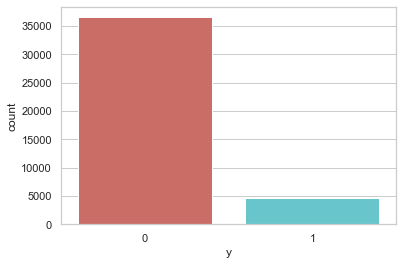

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='y',data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

Hay 36548 'no' y 4640 'sí' en las variables de resultado.

### Create dummy variables

In [10]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1

In [11]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [12]:
data_final=df[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [13]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [14]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']

In [17]:
y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [15]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.287116
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Tue, 31 Mar 2020   Pseudo R-squ.:                  0.1844
Time:                        12:52:26   Log-Likelihood:                -11826.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2385      0.051      4.642      0.000       0.138       0.339

Los $valores-p$ para la mayoría de las variables son muy pequeños, por lo tanto, la mayoría de ellos son significativos para el modelo.

### Logistic Regression Model Fitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\SantaCruz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = logreg.predict(X_test)

In [18]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### Cross Validation

In [19]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [20]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.897


### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10872   109]
 [ 1122   254]]


El resultado nos dice que tenemos 10872 + 254 predicciones correctas y 1122 + 109 predicciones incorrectas.